<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Customer_Segmentation/ML_Model_PCA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cluster Centroids (Original Scale):
 [[-0.52926075 -0.03571854  0.56324341 -0.1175408  -0.20952449 -0.14689076
  -0.35257176 -0.15124835]
 [-1.58223181 -0.2519781  -1.45689435  0.87076619 -0.42570147 -0.77383961
   0.57391377 -0.11820877]
 [ 1.29554572  0.94353375  0.17359455  0.2549154   1.2441879  -0.6043435
  -0.08539972  0.13565432]
 [ 5.57608719 -2.43222099  0.23881213  0.67067195 -1.75484792 -0.75385084
  -0.25252592  1.74524534]
 [ 2.37207341  3.11355587  3.95850145  8.48427106 -1.05646654  3.94824214
   1.04568672 -1.45508602]
 [ 5.96279873  0.7462171  -3.40268357 -0.15648475 -0.43155226  0.79155571
  -1.64924273 -2.19344985]
 [-0.16023931 -2.05351132 -0.37463042 -0.04929509  0.78361232  1.2072327
   0.23618113  0.25171023]
 [ 0.60089737  1.56356542 -0.12304789 -0.89153568 -0.42775821  0.44587587
   0.60701525  0.22360807]]

 Silhouette Score: 0.2573 (Higher is better)
 Davies-Bouldin Index: 1.2260 (Lower is better)


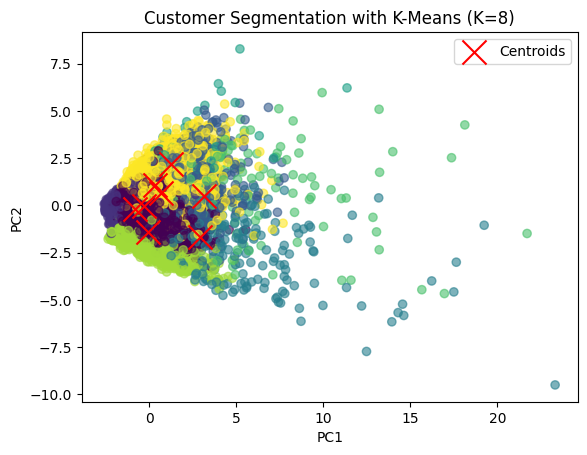

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

file_path = "PCA_Data.csv"
df = pd.read_csv(file_path)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Train K-Means with K = 8
k = 8  # We use K=8 based on the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)  # Assign cluster labels

# Compute Cluster Centroids (Multi-Dimensional Vectors)
centroids = kmeans.cluster_centers_  # Get centroids in normalized space
centroids_original = scaler.inverse_transform(centroids)  # Convert back to original scale

print("Cluster Centroids (Original Scale):\n", centroids_original)

#Evaluate Clustering Performance
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
davies_bouldin = davies_bouldin_score(df_scaled, df['Cluster'])

print(f"\n Silhouette Score: {silhouette_avg:.4f} (Higher is better)")
print(f" Davies-Bouldin Index: {davies_bouldin:.4f} (Lower is better)")

# Compute Distance of Each Point to Its Cluster Center
from scipy.spatial.distance import cdist

# Compute Euclidean distance from each point to its assigned centroid
distances = np.min(cdist(df_scaled, centroids, 'euclidean'), axis=1)
df['Distance_to_Centroid'] = distances


#2D Visualization (Only PCA Data has 2 PCs)
if df.shape[1] >= 2:
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=300, c='red', marker='x', label="Centroids")
    plt.title("Customer Segmentation with K-Means (K=8)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()


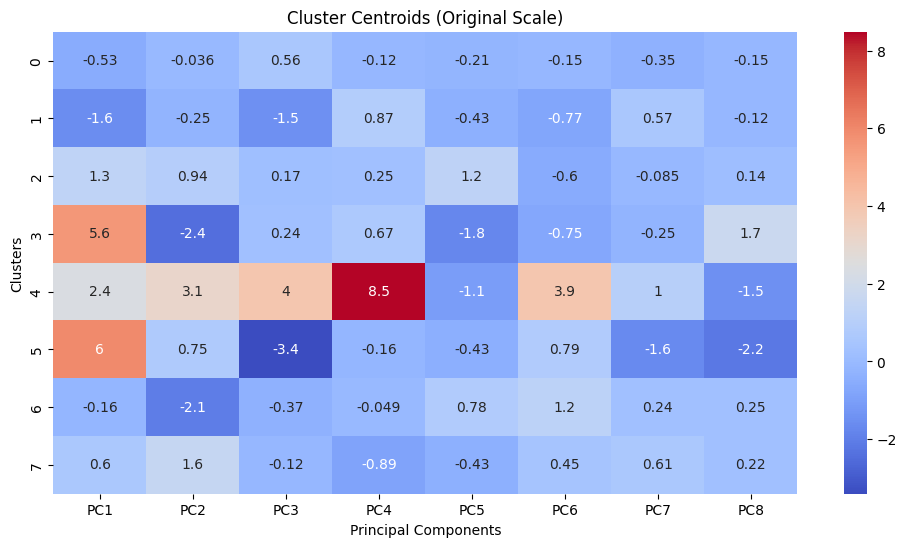

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

centroids = [
    [-0.52926075, -0.03571854, 0.56324341, -0.1175408, -0.20952449, -0.14689076, -0.35257176, -0.15124835],
    [-1.58223181, -0.2519781, -1.45689435, 0.87076619, -0.42570147, -0.77383961, 0.57391377, -0.11820877],
    [1.29554572, 0.94353375, 0.17359455, 0.2549154, 1.2441879, -0.6043435, -0.08539972, 0.13565432],
    [5.57608719, -2.43222099, 0.23881213, 0.67067195, -1.75484792, -0.75385084, -0.25252592, 1.74524534],
    [2.37207341, 3.11355587, 3.95850145, 8.48427106, -1.05646654, 3.94824214, 1.04568672, -1.45508602],
    [5.96279873, 0.7462171, -3.40268357, -0.15648475, -0.43155226, 0.79155571, -1.64924273, -2.19344985],
    [-0.16023931, -2.05351132, -0.37463042, -0.04929509, 0.78361232, 1.2072327, 0.23618113, 0.25171023],
    [0.60089737, 1.56356542, -0.12304789, -0.89153568, -0.42775821, 0.44587587, 0.60701525, 0.22360807]
]

df_centroids = pd.DataFrame(centroids, columns=[f'PC{i+1}' for i in range(8)])

plt.figure(figsize=(12, 6))
sns.heatmap(df_centroids, annot=True, cmap="coolwarm")
plt.xlabel("Principal Components")
plt.ylabel("Clusters")
plt.title("Cluster Centroids (Original Scale)")
plt.show()
